In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from detecto.utils import read_image
from detecto.core import Dataset

jpg_folder = '../filtered_datasets/data_jpgs_exist/'
voc_folder = '../filtered_datasets/pascal_voc_labels_exist/'

# Simple Object Detection Training Pipeline

Here is a simple object detection tutorial using detecto.

## Display Data

In [2]:
images = os.listdir(jpg_folder)
sample_image_file = images[0]
sample_image_file

'66fbe46c-488b-4571-9c74-ee8742f09ccb.jpg'

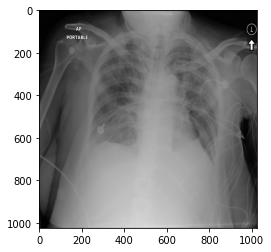

In [3]:
image = read_image(jpg_folder + sample_image_file)
plt.imshow(image)
plt.show()

## Creating Dataset

In [4]:
voc_folder

'../filtered_datasets/pascal_voc_labels_exist/'

In [11]:
from torchvision import transforms
from detecto.utils import normalize_transform

custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(224),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ColorJitter(saturation=0.2),
    transforms.ToTensor(),
    normalize_transform(),
])

dataset = Dataset(voc_folder, jpg_folder, transform=custom_transforms)

In [12]:
dataset._csv.shape

(9555, 9)

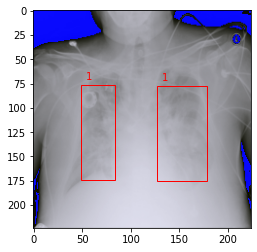

In [13]:
from detecto.visualize import show_labeled_image

image, targets = dataset[0]
show_labeled_image(image, targets['boxes'], targets['labels'])

## Training

In [14]:
from detecto.core import DataLoader, Model

labels = ['1']
model = Model(labels)

In [15]:
model.fit(dataset, verbose=True)

  0%|          | 1/6012 [00:00<10:40,  9.38it/s]

Epoch 1 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<14:30,  6.91it/s]

Epoch 2 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<14:32,  6.89it/s]

Epoch 3 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<14:32,  6.89it/s]

Epoch 4 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<14:31,  6.90it/s]

Epoch 5 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<15:48,  6.34it/s]

Epoch 6 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<16:04,  6.23it/s]

Epoch 7 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<15:51,  6.32it/s]

Epoch 8 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<15:53,  6.30it/s]

Epoch 9 of 10
Begin iterating over training dataset


  0%|          | 1/6012 [00:00<15:58,  6.27it/s]

Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 6012/6012 [14:55<00:00,  6.71it/s]


In [16]:
model.save('model_weights.pth')

## Visualize Output

In [24]:
test_image = read_image('../filtered_datasets/data_jpgs_exist/000db696-cf54-4385-b10b-6b16fbb3f985.jpg')
test_labels, test_boxes, test_scores = model.predict(test_image)

In [26]:
test_scores

tensor([0.8712, 0.8685, 0.5886, 0.3603, 0.2365, 0.1778, 0.1334, 0.1026, 0.0553,
        0.0553])

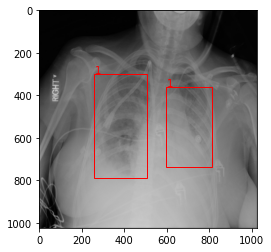

In [27]:
show_labeled_image(test_image, test_boxes[:2], test_labels[:2])

In [21]:
dataset._csv.query(f"filename == '000db696-cf54-4385-b10b-6b16fbb3f985.jpg'")

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
4384,000db696-cf54-4385-b10b-6b16fbb3f985.jpg,1024,1024,1,316,318,486,796,2762
4385,000db696-cf54-4385-b10b-6b16fbb3f985.jpg,1024,1024,1,660,375,806,777,2762


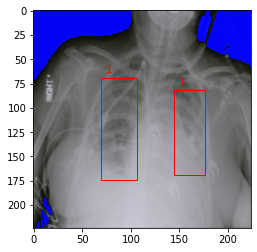

In [22]:
image, targets = dataset[2762]
show_labeled_image(image, targets['boxes'], targets['labels'])